In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import time
from sklearn.model_selection import train_test_split


## read data from csv file


In [27]:
df = pd.read_csv("./insurance.csv")

# show top 10 rows of file
print(df.head(10))

# show detail of data
print(df.info())
print(df.describe())



   age     bmi  children      charges
0   19  27.900         0  16884.92400
1   18  33.770         1   1725.55230
2   28  33.000         3   4449.46200
3   33  22.705         0  21984.47061
4   32  28.880         0   3866.85520
5   31  25.740         0   3756.62160
6   46  33.440         1   8240.58960
7   37  27.740         3   7281.50560
8   37  29.830         2   6406.41070
9   60  25.840         0  28923.13692
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   charges   1338 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 41.9 KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      

## define data X and Y as numpy array
after read data from excel, normalize it with bellow formula : 

new_x = (x - min(x)) / (max(x) - min(x))

In [36]:
# X present parameters (age, bmi, children)
X = df.iloc[:, :-1].to_numpy()
#X2 = X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)

# Y present actual values of result (charges)
Y = df.iloc[:, -1].to_numpy()
#Y2 = np.array((Y-Y.mean())/Y.std())

print(X)
print(Y)

# Normalize data 
X_N = (X - X.min()) / (X.max() - X.min())
Y_N = (Y - Y.min()) / (Y.max() - Y.min())

print(X_N, X_N.shape)
print(Y_N, Y_N.shape)



[[19.   27.9   0.  ]
 [18.   33.77  1.  ]
 [28.   33.    3.  ]
 ...
 [18.   36.85  0.  ]
 [21.   25.8   0.  ]
 [61.   29.07  0.  ]]
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]
[[0.296875   0.4359375  0.        ]
 [0.28125    0.52765625 0.015625  ]
 [0.4375     0.515625   0.046875  ]
 ...
 [0.28125    0.57578125 0.        ]
 [0.328125   0.403125   0.        ]
 [0.953125   0.45421875 0.        ]] (1338, 3)
[0.25161076 0.00963595 0.05311516 ... 0.00810808 0.01414352 0.44724873] (1338,)


## cost functions
 
   - mse cost function : 
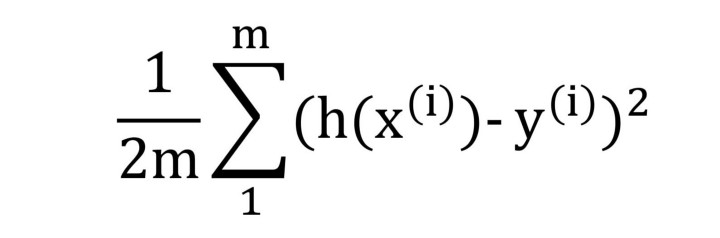
   
   - mae cost function : 
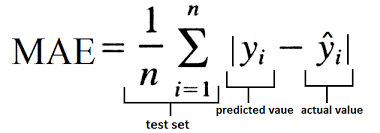

In [37]:
def mse_cost(Y, Y_hat):
    return np.sum((Y_hat - Y)**2) / (2 * len(Y))
    #return sum([val**2 for val in (Y-Y_hat)]) / (2 * len(Y))
    
def mae_cost(Y, Y_hat):
    return np.sum(abs(Y_hat - Y)) / len(Y)

## split train and test datas
we seperate test data and train data for normal datas and unnormal datas.

80% of data is for train and 20% for test.


In [177]:
X_train_N, X_test_N, Y_train_N, Y_test_N = train_test_split(X_N, Y_N, test_size = 0.2)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)


## implement predict function

this function, get three parameters (b , theta, X) and then calcute predicted Y with this parameters.

new_y = X.THETA + b

In [178]:
def predict_Y(b, theta, X):
    return b + np.dot(X, theta)


## update theta for mse and mae cost functions


In [179]:
def update_theta_mse(X, Y, Y_hat, b_0, theta_0, learning_rate):
    d_b= -np.sum(Y - Y_hat) / len(Y)
    d_weight = -np.sum(np.dot((Y - Y_hat), X))  / len(Y)
    
    b_1 = b_0 - (learning_rate * d_b)
    theta_1 = theta_0 - (learning_rate * d_weight)
    
    return b_1, theta_1
   
    
def update_theta_mae(X, Y, Y_hat, theta_0, learning_rate):
    d_weight = -1
    theta_1 = theta_0 - (learning_rate * d_weight)
    
    return theta_1
    

## initialize bias and weights 

select randomlly value for b and theta

In [180]:
def initialize(dim):
    b=random.random()
    theta=np.random.rand(dim)
    return b,theta


## run stochastic-gradient descent algorithm

#### step 1 : 
select random value for b and theta in initialize() function

#### step 2 : 
define gd_iterations_df for save iterations and cost value each 10 epoch

#### step 3 : 
start learning in loop.
in each epoch:
 - choice random index for select one data from X and Y stochasticlly
 - calcute Y_hat with predict_Y() function
 - calcute cost of that epoch with mse_cost() function
 - update value of theta and b with update_theta() function
 - and save value of iteration and cost each 10 epoch (if you want save data of each epoch set 1)

#### step 4 : 
run gradient descent algorithm with suitable value for alpha and number of iteration

In [213]:
def stochastic_gradient_descent_mse(X, Y, alpha, num_iterations):
    b, theta=initialize(X.shape[1])
    epoch_num=0
    gd_iterations_df=pd.DataFrame(columns=['iteration', 'cost'])
    result_idx=0
    for epoch in range(num_iterations):
        random_index = np.random.choice(len(Y))
        X = np.array([X[random_index]])
        Y = np.array([Y[random_index]])
        Y_hat= predict_Y(b, theta, X)
        this_cost= mse_cost(Y, Y_hat)
        prev_b= b
        prev_theta= theta
        b,theta= update_theta_mse(X, Y, Y_hat, prev_b, prev_theta, alpha)
        if(epoch % 1 == 0):
            gd_iterations_df.loc[result_idx]=[epoch_num, this_cost]
            result_idx += 1
            epoch_num += 1
    print("Final Estimate of b and theta in Gradient Descent with MSE cost function: ", b, theta)
    return gd_iterations_df, b, theta


print("NOT NORMALIZED DATA : ")
s_time = time.time()
sgd_iterations_df,b,theta= stochastic_gradient_descent_mse(X, Y,  alpha=0.001, num_iterations=1000)
timer_1 = time.time() - s_time

print("NORMALIZED DATA : ")
s_time = time.time()
sgd_iterations_df_normalized,b,theta= stochastic_gradient_descent_mse(X_N, Y_N,  alpha=0.001, num_iterations=1000)
timer_2 = time.time() - s_time

print(f"stochastic-gradient-descent with normalized data time : {timer_2}")
print(f"stochastic-gradient-descent without normalized data time : {timer_1}")


NOT NORMALIZED DATA : 


/tmp/ipykernel_298943/3251645962.py:2: RuntimeWarning: overflow encountered in square
  return np.sum((Y_hat - Y)**2) / (2 * len(Y))
/tmp/ipykernel_298943/3251645962.py:2: RuntimeWarning: overflow encountered in square
  return np.sum((Y_hat - Y)**2) / (2 * len(Y))
/tmp/ipykernel_298943/3251645962.py:2: RuntimeWarning: overflow encountered in square
  return np.sum((Y_hat - Y)**2) / (2 * len(Y))
/tmp/ipykernel_298943/3251645962.py:2: RuntimeWarning: overflow encountered in square
  return np.sum((Y_hat - Y)**2) / (2 * len(Y))
/tmp/ipykernel_298943/3251645962.py:2: RuntimeWarning: overflow encountered in square
  return np.sum((Y_hat - Y)**2) / (2 * len(Y))
/tmp/ipykernel_298943/3251645962.py:2: RuntimeWarning: overflow encountered in square
  return np.sum((Y_hat - Y)**2) / (2 * len(Y))
/tmp/ipykernel_298943/3251645962.py:2: RuntimeWarning: overflow encountered in square
  return np.sum((Y_hat - Y)**2) / (2 * len(Y))
/tmp/ipykernel_298943/3251645962.py:2: RuntimeWarning: overflow encou

/tmp/ipykernel_298943/3251645962.py:2: RuntimeWarning: overflow encountered in square
  return np.sum((Y_hat - Y)**2) / (2 * len(Y))
/tmp/ipykernel_298943/3251645962.py:2: RuntimeWarning: overflow encountered in square
  return np.sum((Y_hat - Y)**2) / (2 * len(Y))
/tmp/ipykernel_298943/3251645962.py:2: RuntimeWarning: overflow encountered in square
  return np.sum((Y_hat - Y)**2) / (2 * len(Y))
/tmp/ipykernel_298943/3251645962.py:2: RuntimeWarning: overflow encountered in square
  return np.sum((Y_hat - Y)**2) / (2 * len(Y))
/tmp/ipykernel_298943/3251645962.py:2: RuntimeWarning: overflow encountered in square
  return np.sum((Y_hat - Y)**2) / (2 * len(Y))
/tmp/ipykernel_298943/3251645962.py:2: RuntimeWarning: overflow encountered in square
  return np.sum((Y_hat - Y)**2) / (2 * len(Y))
/tmp/ipykernel_298943/3251645962.py:2: RuntimeWarning: overflow encountered in square
  return np.sum((Y_hat - Y)**2) / (2 * len(Y))
/tmp/ipykernel_298943/3251645962.py:2: RuntimeWarning: overflow encou

Final Estimate of b and theta in Gradient Descent with MSE cost function:  nan [nan nan nan]
NORMALIZED DATA : 
Final Estimate of b and theta in Gradient Descent with MSE cost function:  -0.15898728414845906 [0.26937979 0.48108087 0.13139261]
stochastic-gradient-descent with normalized data time : 0.8378379344940186
stochastic-gradient-descent without normalized data time : 0.8188803195953369


## draw plot for stochastic-gradient-descent with MSE cost function
draw MSE cost function per iterations number

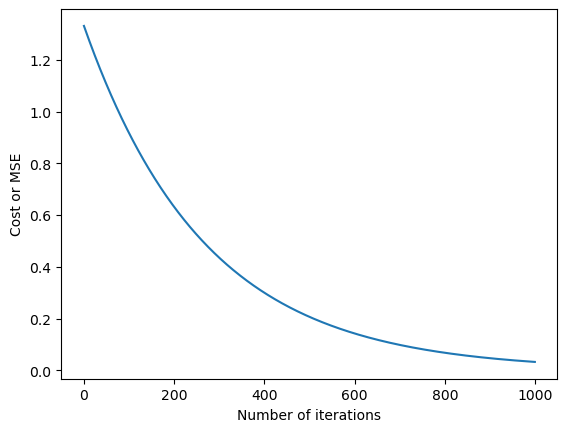

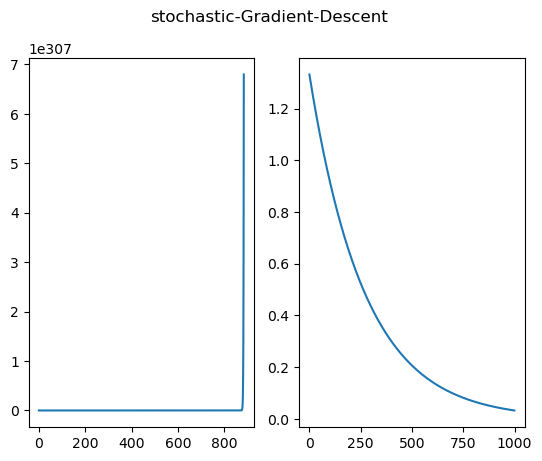

In [191]:
plt.plot(sgd_iterations_df_normalized['iteration'], sgd_iterations_df_normalized['cost'])
plt.xlabel("Number of iterations")
plt.ylabel("Cost or MSE")

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('stochastic-Gradient-Descent')
ax1.plot(sgd_iterations_df['iteration'], sgd_iterations_df['cost'])
ax2.plot(sgd_iterations_df_normalized['iteration'], sgd_iterations_df_normalized['cost'])

## run stochastic-gradient descent with MAE cost function

#### step 1 : 
select random value for theta in initialize() function

#### step 2 : 
define gd_iterations_df for save iterations and cost value each 10 epoch

#### step 3 : 
start learning in loop.
in each epoch:
 - choice random index for select one data from X and Y stochasticlly
 - calcute Y_hat with predict_Y() function with b = 0
 - calcute cost of that epoch with mae_cost() function
 - update value of theta and b with update_theta() function
 - and save value of iteration and cost each 10 epoch (if you want save data of each epoch set 1)

#### step 4 : 
run gradient descent algorithm with suitable value for alpha and number of iteration

In [229]:
def stochastic_gradient_descent_mae(X, Y, alpha, num_iterations):
    b, theta=initialize(X.shape[1])
    epoch_num=0
    gd_iterations_df=pd.DataFrame(columns=['iteration', 'cost'])
    result_idx=0
    for epoch in range(num_iterations):
        random_index = np.random.choice(len(Y))
        X = np.array([X[random_index]])
        Y = np.array([Y[random_index]])
        Y_hat= predict_Y(0, theta, X)
        this_cost= mae_cost(Y, Y_hat)
        prev_theta= theta
        theta= update_theta_mae(X, Y, Y_hat, prev_theta, alpha)
        if(epoch % 1 == 0):
            gd_iterations_df.loc[result_idx]=[epoch_num, this_cost]
            result_idx += 1
            epoch_num += 1
    print("Final Estimate of theta in Gradient Descent with MAE cost function:: ", theta)
    return gd_iterations_df, theta



print("NOT NORMALIZED DATA : ")
s_time = time.time()
sgd_iterations_df_mae, theta= stochastic_gradient_descent_mae(X, Y,  alpha=0.001, num_iterations=1000)
timer_1 = time.time() - s_time

print("NORMALIZED DATA : ")
s_time = time.time()
sgd_iterations_df_normalized_mae, theta= stochastic_gradient_descent_mae(X_N, Y_N,  alpha=0.001, num_iterations=1000)
timer_2 = time.time() - s_time

print(f"stochastic-gradient-descent with normalized data time : {timer_2}")
print(f"stochastic-gradient-descent without normalized data time : {timer_1}")


NOT NORMALIZED DATA : 
Final Estimate of theta in Gradient Descent with MAE cost function::  [1.88128024 1.57842218 1.29237036]
NORMALIZED DATA : 
Final Estimate of theta in Gradient Descent with MAE cost function::  [1.39594977 1.67176431 1.60587919]
stochastic-gradient-descent with normalized data time : 0.823965311050415
stochastic-gradient-descent without normalized data time : 0.8593895435333252


## draw plot for stochastic-gradient-descent with MAE cost function
draw MAE cost function per iterations number

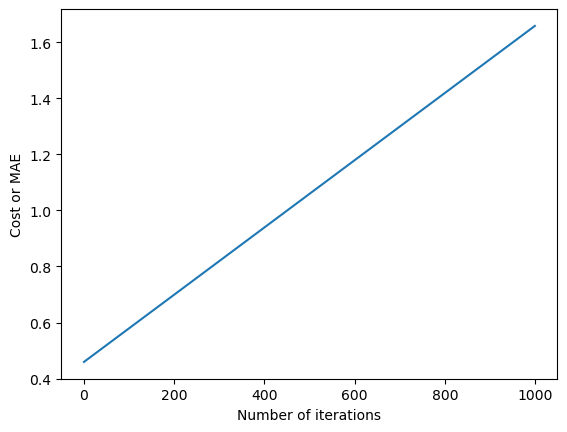

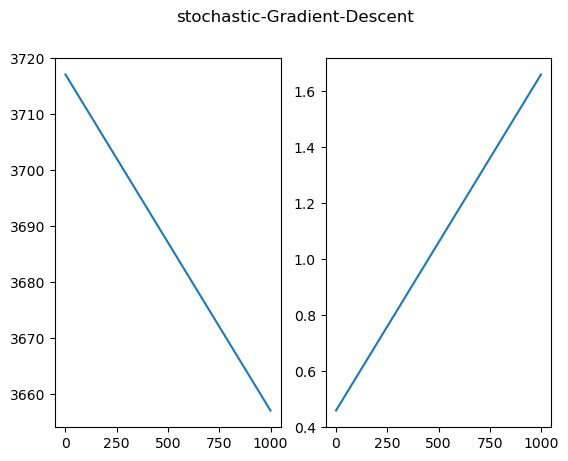

In [231]:
plt.plot(sgd_iterations_df_normalized_mae['iteration'], sgd_iterations_df_normalized_mae['cost'])
plt.xlabel("Number of iterations")
plt.ylabel("Cost or MAE")

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('stochastic-Gradient-Descent')
ax1.plot(sgd_iterations_df_mae['iteration'], sgd_iterations_df_mae['cost'])
ax2.plot(sgd_iterations_df_normalized_mae['iteration'], sgd_iterations_df_normalized_mae['cost'])

## implement Linear Regression with sklearn


In [232]:
from sklearn.linear_model import LinearRegression

s_time = time.time()

regressor = LinearRegression()

regressor.fit(X_N, Y_N)

timer = time.time() - s_time

print(regressor.intercept_)

print(regressor.coef_)

print("timer : " , timer)

-0.12830491241144207
[0.2451716  0.33924702 0.55457525]
timer :  0.0026140213012695312


## implement stochastic gradient descent with squared_error and huber 

In [233]:
from sklearn.linear_model import SGDRegressor

## with squared_error cost functoin
sgd_reg_ = SGDRegressor(max_iter=100, penalty=None, eta0=0.1, loss= 'squared_error')

sgd_reg.fit(X_N, Y_N.ravel())

print(sgd_reg.intercept_, sgd_reg.coef_)

## with huber cost function
sgd_reg_ = SGDRegressor(max_iter=100, penalty=None, eta0=0.1, loss= 'huber')

sgd_reg.fit(X_N, Y_N.ravel())

print(sgd_reg.intercept_, sgd_reg.coef_)

[-0.05777343] [0.23999235 0.19496372 0.02214717]
[-0.04062112] [0.24785941 0.20404076 0.02254694]
